In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [4]:
X = df_pen.drop(['island'], axis = 1)
y = df_pen['island']

## Data Pre-processing

In [5]:
categorical_x = ['species', 'sex']
numerical_x = X.drop(categorical_x, axis = 1).columns

In [6]:
## If y is categorical:
y.fillna(y.mode(), inplace= True)
##If y is numerical
# y.fillna(y.mean(), inplace= True)
for i in numerical_x:
    X[i].fillna(X[i].mean(), inplace = True)

for i in categorical_x:
    X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=45)

In [8]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Model implementation

In [9]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [10]:
svc_model = SVC()

In [11]:
svc_model.fit(X_train,y_train)

SVC()

### Evaluation

In [12]:
y_pred = svc_model.predict(X_test)

In [13]:
metrics.accuracy_score(y_test,y_pred)

0.7101449275362319

In [14]:
metrics.confusion_matrix(y_test,y_pred)

array([[27,  3,  3],
       [ 0, 21,  7],
       [ 0,  7,  1]], dtype=int64)

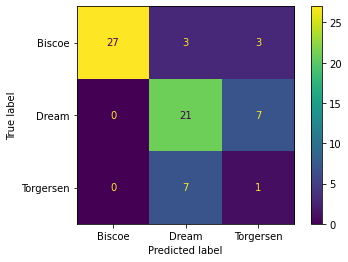

In [15]:
metrics.plot_confusion_matrix(svc_model, X_test,y_test)

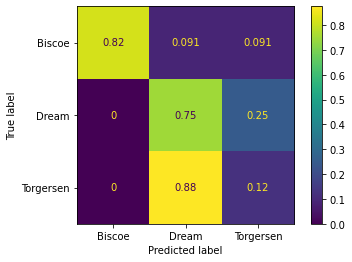

In [16]:
metrics.plot_confusion_matrix(svc_model, X_test,y_test,normalize='true')

In [17]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Biscoe       1.00      0.82      0.90        33
       Dream       0.68      0.75      0.71        28
   Torgersen       0.09      0.12      0.11         8

    accuracy                           0.71        69
   macro avg       0.59      0.56      0.57        69
weighted avg       0.76      0.71      0.73        69



## Grid Search

In [18]:
svc_model = SVC()

In [19]:
parametros = {'C':[0.01,0.1,1, 10],'kernel':['linear','rbf']}

In [20]:
grid_model = GridSearchCV(svc_model,param_grid= parametros, cv = 5, scoring='accuracy', n_jobs=-1)

In [21]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [22]:
grid_model.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [23]:
y_pred = grid_model.predict(X_test)

In [24]:
metrics.accuracy_score(y_test,y_pred)

0.7101449275362319

In [25]:
metrics.confusion_matrix(y_test,y_pred)

array([[27,  2,  4],
       [ 0, 21,  7],
       [ 0,  7,  1]], dtype=int64)

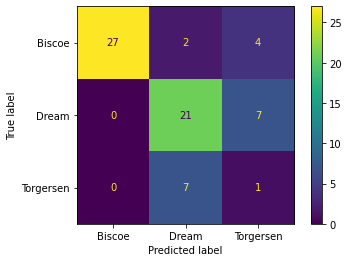

In [26]:
metrics.plot_confusion_matrix(grid_model, X_test,y_test)

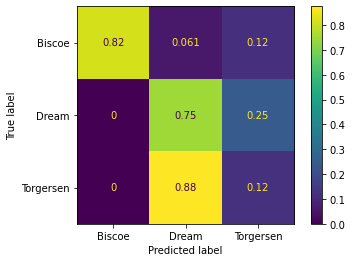

In [27]:
metrics.plot_confusion_matrix(grid_model, X_test,y_test,normalize='true')

In [28]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Biscoe       1.00      0.82      0.90        33
       Dream       0.70      0.75      0.72        28
   Torgersen       0.08      0.12      0.10         8

    accuracy                           0.71        69
   macro avg       0.59      0.56      0.57        69
weighted avg       0.77      0.71      0.74        69

